## PCA for MFCC values and Time series data.

In [3]:
from scipy.io.wavfile import read, write
import os 
import librosa
import librosa.display
import librosa.feature
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd

import pathlib
import csv 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import keras
from keras import layers
from keras import layers
import keras
from keras.models import Sequential
import warnings

from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras.layers import Activation, Dense, Dropout, Conv2D, Flatten, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling1D, AveragePooling2D, Input, Add
from keras.models import Sequential
from keras.optimizers import SGD

from makeData import DataObj
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn import tree

from sklearn.decomposition import PCA, FastICA, TruncatedSVD

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
import seaborn as sns

Using TensorFlow backend.


In [24]:
# PCA of MFCC
trainFilename = 'data/featuresMFCC_train.npy'
testFilename = 'data/featuresMFCC_test.npy'

npd = np.load(trainFilename, allow_pickle = True).tolist()
data = pd.DataFrame(data = npd)
df_train = data.drop(data.columns[0],axis=1)

npd = np.load(testFilename, allow_pickle = True).tolist()
data = pd.DataFrame(data = npd)
df_test = data.drop(data.columns[0],axis=1)

genreList = df_train.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genreList)

scaler = StandardScaler()
X = scaler.fit_transform(np.array(df_train.iloc[:, :-1], dtype = float))
#X = X[:, :25000]

X_predict = scaler.fit_transform(np.array(df_test, dtype = float))
#X_predict = X_predict[:, :25000]

## Loading MFCC data

In [121]:
# Applying PCA to MFCC
pca = PCA(n_components=5)
#pca = TruncatedSVD(n_components = 20)

pca.fit(X) 
X = pca.transform(X)

pca.fit(X_predict) 
X_predict = pca.transform(X_predict)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
resFile = 'PCA_ANN'
model = Sequential()
#model.add(layers.SimpleRNN(256,  activation='relu', input_shape=(X_train.shape[1],), return_sequences = True))
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
#model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['accuracy'])
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

classifier = model.fit(X_train, y_train, epochs=500, batch_size=128)
result = model.predict_classes(X_predict)
y_pred = model.predict_classes(X_test)

Epoch 1/500
1920/1920 [==============================] - 0s 50us/step - loss: 1.7813 - accuracy: 0.2073
Epoch 2/500
1920/1920 [==============================] - 0s 8us/step - loss: 1.7651 - accuracy: 0.2109
Epoch 3/500
1920/1920 [==============================] - 0s 9us/step - loss: 1.7561 - accuracy: 0.2094
Epoch 4/500
1920/1920 [==============================] - 0s 8us/step - loss: 1.7498 - accuracy: 0.2167
Epoch 5/500
1920/1920 [==============================] - 0s 8us/step - loss: 1.7449 - accuracy: 0.2271
Epoch 6/500
1920/1920 [==============================] - 0s 9us/step - loss: 1.7408 - accuracy: 0.2339
Epoch 7/500
1920/1920 [==============================] - 0s 9us/step - loss: 1.7373 - accuracy: 0.2328
Epoch 8/500
1920/1920 [==============================] - 0s 9us/step - loss: 1.7344 - accuracy: 0.2354
Epoch 9/500
1920/1920 [==============================] - 0s 9us/step - loss: 1.7316 - accuracy: 0.2370
Epoch 10/500
1920/1920 [==============================] - 0s 9us/step - 

1920/1920 [==============================] - 0s 9us/step - loss: 1.6300 - accuracy: 0.3214
Epoch 158/500
1920/1920 [==============================] - 0s 8us/step - loss: 1.6295 - accuracy: 0.3198
Epoch 159/500
1920/1920 [==============================] - 0s 8us/step - loss: 1.6292 - accuracy: 0.3177
Epoch 160/500
1920/1920 [==============================] - 0s 8us/step - loss: 1.6286 - accuracy: 0.3156
Epoch 161/500
1920/1920 [==============================] - 0s 9us/step - loss: 1.6278 - accuracy: 0.3167
Epoch 162/500
1920/1920 [==============================] - 0s 8us/step - loss: 1.6274 - accuracy: 0.3214
Epoch 163/500
1920/1920 [==============================] - 0s 8us/step - loss: 1.6270 - accuracy: 0.3182
Epoch 164/500
1920/1920 [==============================] - 0s 8us/step - loss: 1.6266 - accuracy: 0.3203
Epoch 165/500
1920/1920 [==============================] - 0s 8us/step - loss: 1.6261 - accuracy: 0.3182
Epoch 166/500
1920/1920 [==============================] - 0s 8us/ste

1920/1920 [==============================] - 0s 8us/step - loss: 1.5929 - accuracy: 0.3411
Epoch 312/500
1920/1920 [==============================] - 0s 8us/step - loss: 1.5929 - accuracy: 0.3365
Epoch 313/500
1920/1920 [==============================] - 0s 8us/step - loss: 1.5930 - accuracy: 0.3375
Epoch 314/500
1920/1920 [==============================] - 0s 8us/step - loss: 1.5930 - accuracy: 0.3375
Epoch 315/500
1920/1920 [==============================] - 0s 8us/step - loss: 1.5926 - accuracy: 0.3391
Epoch 316/500
1920/1920 [==============================] - 0s 9us/step - loss: 1.5927 - accuracy: 0.3375
Epoch 317/500
1920/1920 [==============================] - 0s 10us/step - loss: 1.5925 - accuracy: 0.3365
Epoch 318/500
1920/1920 [==============================] - 0s 10us/step - loss: 1.5923 - accuracy: 0.3380
Epoch 319/500
1920/1920 [==============================] - 0s 10us/step - loss: 1.5924 - accuracy: 0.3396
Epoch 320/500
1920/1920 [==============================] - 0s 9us/

1920/1920 [==============================] - 0s 11us/step - loss: 1.5868 - accuracy: 0.3427
Epoch 389/500
1920/1920 [==============================] - 0s 12us/step - loss: 1.5867 - accuracy: 0.3427
Epoch 390/500
1920/1920 [==============================] - 0s 11us/step - loss: 1.5866 - accuracy: 0.3411
Epoch 391/500
1920/1920 [==============================] - 0s 11us/step - loss: 1.5864 - accuracy: 0.3385
Epoch 392/500
1920/1920 [==============================] - 0s 11us/step - loss: 1.5864 - accuracy: 0.3427
Epoch 393/500
1920/1920 [==============================] - 0s 15us/step - loss: 1.5862 - accuracy: 0.3417
Epoch 394/500
1920/1920 [==============================] - 0s 13us/step - loss: 1.5861 - accuracy: 0.3422
Epoch 395/500
1920/1920 [==============================] - 0s 11us/step - loss: 1.5860 - accuracy: 0.3411
Epoch 396/500
1920/1920 [==============================] - 0s 11us/step - loss: 1.5864 - accuracy: 0.3396
Epoch 397/500
1920/1920 [==============================] - 0

In [122]:
# SVM Model
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X_train, y_train)
result = clf.predict(X_predict)
y_pred = clf.predict(X_test)
resFile = 'SVM'

In [124]:
# Predict and Write to file
df = pd.read_csv('data/test_idx.csv')
i = 0
final = []
for index, row in df.iterrows():
    row1 = [row[0], result[i]]
    #print(row1)
    final.append(row1)
    i += 1
df2 = pd.DataFrame(data = final, columns = ['id', 'genre'])

filename = 'data/fin_' + resFile + '.csv'
df2.to_csv(filename, index = False)
print('DONE.')

DONE.


ALGORITHM:  PCA_ANN 

              precision    recall  f1-score   support

           0       0.26      0.32      0.29        81
           1       0.09      0.05      0.06        64
           2       0.28      0.26      0.27        87
           3       0.32      0.60      0.42        83
           4       0.33      0.05      0.08        86
           5       0.38      0.47      0.42        79

    accuracy                           0.30       480
   macro avg       0.28      0.29      0.26       480
weighted avg       0.28      0.30      0.26       480



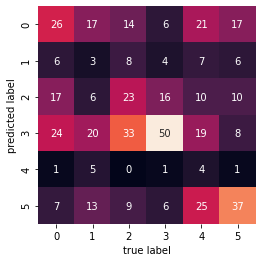

In [9]:
# Confussion Matrix and Classification Report
print('ALGORITHM: ', resFile, '\n')
matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False)

plt.xlabel('true label')
plt.ylabel('predicted label');

print(classification_report(y_test, y_pred))

## Applying SVM to points extracted from time series data

In [9]:
# PCA of time series
X_file = 'data/timeSeries_points_train.npy'
X_predict_file = 'data/timeSeries_points_test.npy'
y_file = 'data/timeSeries_y.npy'

In [10]:
X = np.load(X_file, allow_pickle = True)
X_predict = np.load(X_predict_file, allow_pickle = True)
y = np.load(y_file, allow_pickle = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
# SVM Model
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X_train, y_train)
result = clf.predict(X_predict)
y_pred = clf.predict(X_test)
resFile = 'SVM_TS'

scores = cross_val_score(clf, X, y, cv = 5)

In [15]:
# Predict and Write to file
df = pd.read_csv('data/test_idx.csv')
i = 0
final = []
for index, row in df.iterrows():
    row1 = [row[0], result[i]]
    #print(row1)
    final.append(row1)
    i += 1
df2 = pd.DataFrame(data = final, columns = ['id', 'genre'])

filename = 'data/fin_' + resFile + '.csv'
df2.to_csv(filename, index = False)
print('DONE.')

DONE.


ALGORITHM:  SVM_TS 

              precision    recall  f1-score   support

           0       0.29      0.39      0.33        64
           1       0.24      0.12      0.17        80
           2       0.24      0.32      0.28        69
           3       0.37      0.62      0.46        90
           4       0.53      0.10      0.17        98
           5       0.41      0.47      0.44        79

    accuracy                           0.33       480
   macro avg       0.35      0.34      0.31       480
weighted avg       0.36      0.33      0.30       480

Accuracy:  0.3333333333333333

Cross-Validated scores:  [0.2625     0.32291667 0.30208333 0.27291667 0.33958333]

Accuracy: 0.30 (+/- 0.06)


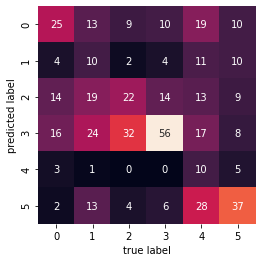

In [20]:
# Confussion Matrix and Classification Report
print('ALGORITHM: ', resFile, '\n')
matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False)

plt.xlabel('true label')
plt.ylabel('predicted label');

print(classification_report(y_test, y_pred))
print('Accuracy: ', accuracy_score(y_test, y_pred))

print('\nCross-Validated scores: ', scores)
print("\nAccuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [1]:
# PCA of time series
X_file = 'data/timeSeries_PCA_train.npy'
X_predict_file = 'data/timeSeries_PCA_test.npy'
y_file = 'data/timeSeries_y.npy'

In [5]:
X = np.load(X_file, allow_pickle = True)
X_predict = np.load(X_predict_file, allow_pickle = True)
y = np.load(y_file, allow_pickle = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
# SVM Model
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X_train, y_train)
result = clf.predict(X_predict)
y_pred = clf.predict(X_test)
resFile = 'SVM_TS'

scores = cross_val_score(clf, X, y, cv = 5)

ALGORITHM:  SVM_TS 

              precision    recall  f1-score   support

           0       0.17      0.09      0.12        79
           1       0.12      0.05      0.07        87
           2       0.23      0.86      0.36        71
           3       0.07      0.02      0.04        83
           4       0.25      0.16      0.20        85
           5       0.35      0.25      0.29        75

    accuracy                           0.22       480
   macro avg       0.20      0.24      0.18       480
weighted avg       0.19      0.22      0.17       480

Accuracy:  0.22291666666666668

Cross-Validated scores:  [0.23958333 0.22291667 0.28125    0.27083333 0.22083333]

Accuracy: 0.25 (+/- 0.05)


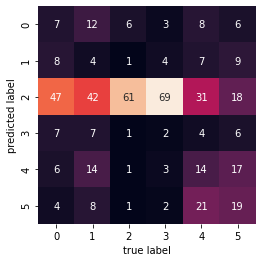

In [7]:
# Confussion Matrix and Classification Report
print('ALGORITHM: ', resFile, '\n')
matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False)

plt.xlabel('true label')
plt.ylabel('predicted label');

print(classification_report(y_test, y_pred))
print('Accuracy: ', accuracy_score(y_test, y_pred))

print('\nCross-Validated scores: ', scores)
print("\nAccuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))